### Problem : Analyze diamonds by their cut, color, clarity, price, and other attributes

### Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, cohen_kappa_score  #Classification metrics
from sklearn.metrics import mean_squared_error, r2_score #Regression metrics

from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier



###  DATA HANDLING

#### Getting sense of the data

In [2]:
diamond=pd.read_csv('diamonds.csv')

In [3]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
diamond.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Dropping unneccesary column

In [5]:
diamond=diamond.drop('Unnamed: 0',axis=1)

In [6]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Checking for null values

In [7]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Univariate Analysis

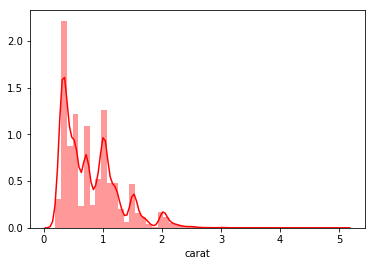

In [8]:
sns.distplot(diamond.carat , color = 'red')

Carat is right skewed.
And we can see multiple peaks in the data. Which suggests there are different types of diamonds.

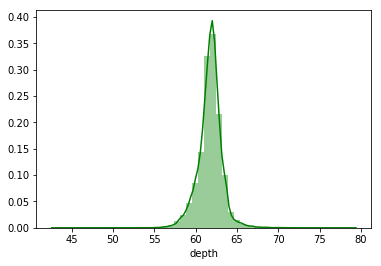

In [9]:
sns.distplot(diamond.depth , color = 'green')

depth seems to follow normal distribution.

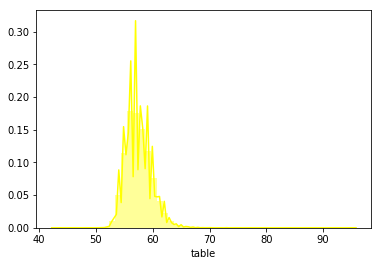

In [10]:
sns.distplot(diamond.table , color = 'yellow')

Table seems to follow normal distribution.

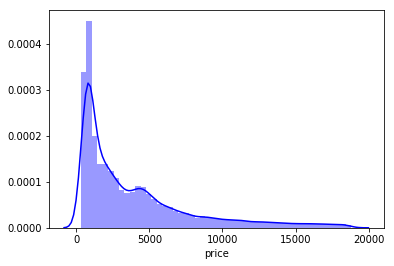

In [11]:
sns.distplot(diamond.price , color = 'blue')

Price is right skewed.

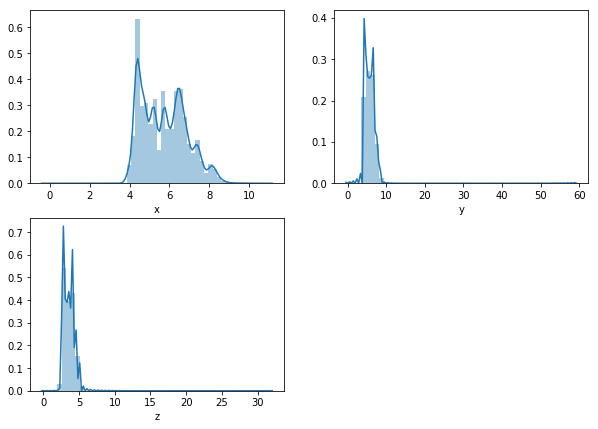

In [12]:
plt.figure(1,figsize=[10,7])
plt.subplot(221)
sns.distplot(diamond.x)

plt.subplot(222)
sns.distplot(diamond.y)

plt.subplot(223)
sns.distplot(diamond.z)

plt.show()

In [13]:
diamond.cut.unique()  # count 5

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [14]:
diamond.color.unique()   # count 7

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [15]:
diamond.clarity.unique()   # count 8

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

### Bivariate analysis

In [16]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Carat vs Price

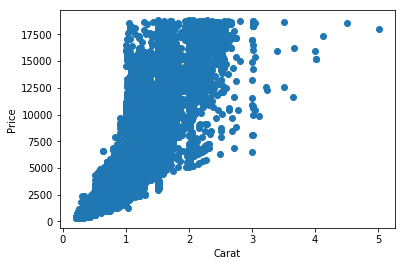

In [17]:
plt.scatter(diamond.carat , diamond.price)
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

With small increase in carat value the price increases by large value.

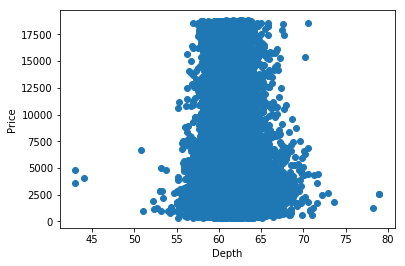

In [18]:
plt.scatter(diamond.depth , diamond.price)
plt.xlabel('Depth')
plt.ylabel('Price')
plt.show()

It seems that depth and price are not correlated.

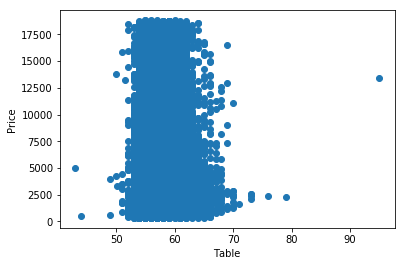

In [19]:
plt.scatter(diamond.table , diamond.price)
plt.xlabel('Table')
plt.ylabel('Price')
plt.show()

It seems that table and price are not correlated.

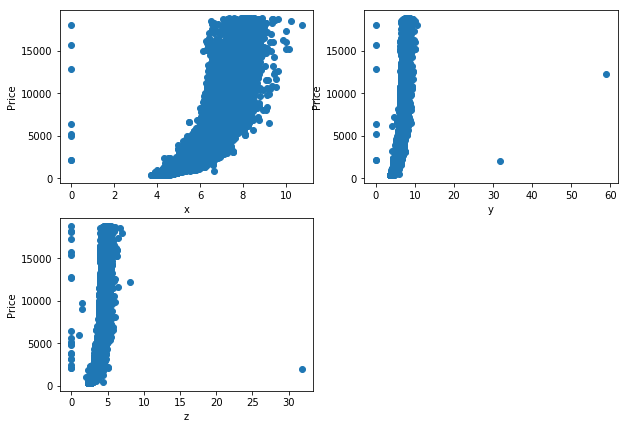

In [20]:
plt.figure(1,figsize=[10,7])
plt.subplot(221)
plt.scatter(diamond.x , diamond.price)
plt.xlabel('x')
plt.ylabel('Price')

plt.subplot(222)
plt.scatter(diamond.y , diamond.price)
plt.xlabel('y')
plt.ylabel('Price')

plt.subplot(223)
plt.scatter(diamond.z , diamond.price)
plt.xlabel('z')
plt.ylabel('Price')
plt.show()

Upward trend can be seen between x and price. For y and z no relation is visible.

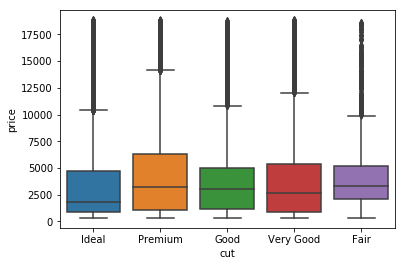

In [21]:
sns.boxplot(diamond.cut , diamond.price)

In [22]:
diamond.groupby('cut').price.median()

cut
Fair         3282.0
Good         3050.5
Ideal        1810.0
Premium      3185.0
Very Good    2648.0
Name: price, dtype: float64

In [23]:
diamond.groupby('cut').price.mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

Mean price for different types of cuts is in following order: 

    Premium > Fair > Very Good > Good > Ideal

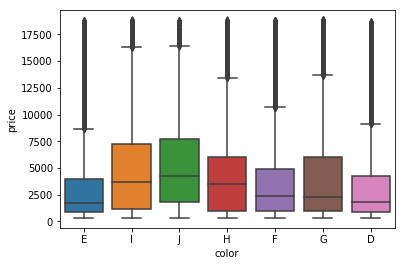

In [24]:
sns.boxplot(diamond.color , diamond.price)
plt.show()
# color vs price

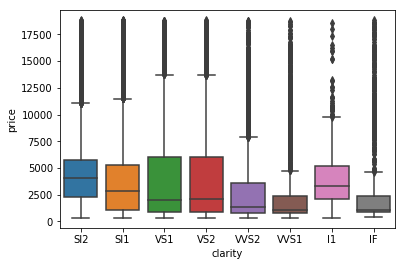

In [25]:
sns.boxplot(diamond.clarity , diamond.price)
plt.show()

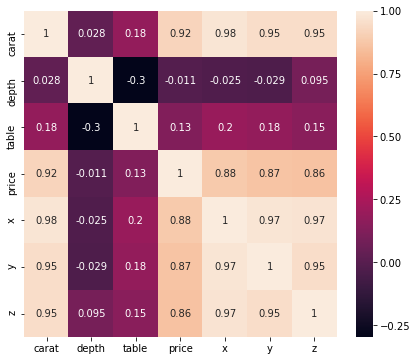

In [26]:
plt.figure(figsize=[7,6])
sns.heatmap(diamond.corr() , annot = True)
plt.show()

price is highly correlated with carat, x, y and z.

But there is also high correlation among carat, x, y and z.

### NULL value treatment

In [27]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No null values found.

### Linear Regression

In [28]:
X=diamond.drop('price',axis = 1)
y=diamond.price

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

### One hot encoding

In [30]:
dummyXtrain = pd.get_dummies(X_train)
dummyXtest = pd.get_dummies(X_test)

In [31]:
dummyXtrain.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
14615,1.16,62.1,54.0,6.79,6.74,4.20,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
19730,1.52,61.0,56.0,7.45,7.41,4.53,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
30998,0.36,61.0,54.0,4.60,4.64,2.82,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
52837,0.74,61.0,57.0,5.83,5.88,3.57,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15828,1.04,61.1,56.0,6.54,6.56,4.01,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
lr = LinearRegression()

In [33]:
lr.fit(dummyXtrain,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
y_pred = lr.predict(dummyXtest)

In [35]:
mean_squared_error(y_test,y_pred)

1323537.7711294438

In [36]:
lr.score(dummyXtest,y_test)

0.9174358544050012

### Random Forest regressor

In [37]:
rfr = RandomForestRegressor()

In [38]:
rfr.fit(dummyXtrain,y_train)

C:\Users\PRAMOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [39]:
y_pred = rfr.predict(dummyXtest)

In [40]:
rfr.score(dummyXtest,y_test)   #r2_score

0.9788363468452563

In [41]:
mean_squared_error(y_test,y_pred)

339262.2078691088

### Classification

In [42]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [43]:
X=diamond.drop('cut',axis=1)

In [44]:
y=diamond.cut

In [45]:
diamond.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [47]:
dummyXtrain = pd.get_dummies(X_train)
dummyXtest = pd.get_dummies(X_test)

### KNN

In [48]:
knn = KNeighborsClassifier()

In [49]:
knn.fit(dummyXtrain,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
y_pred = knn.predict(dummyXtest)

In [51]:
accuracy_score(y_test,y_pred)

0.5423309850451119

### Decision Tree Classifier 

In [52]:
dtree = DecisionTreeClassifier()

In [53]:
dtree.fit(dummyXtrain,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [54]:
y_pred = dtree.predict(dummyXtest)

In [55]:
accuracy_score(y_test,y_pred)

0.7012730194042763

### Random Forest Classifier

In [56]:
rfr = RandomForestClassifier()

In [57]:
rfr.fit(dummyXtrain,y_train)

C:\Users\PRAMOD\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
y_pred = rfr.predict(dummyXtest)

In [59]:
accuracy_score(y_test,y_pred)

0.7434804103324681